<a href="https://colab.research.google.com/github/hungprovip0089/LSTM-MA/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import librabries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


#Load data and separate into 2 sets: first 70% is train, the rest is test

In [ ]:
dataset = pd.read_csv('AAPL.csv')[-1::-1]
size = len(dataset)
train_dataset = dataset.iloc[0:int(0.7*size),4].values
test_dataset = dataset.iloc[int(0.7*size):,4].values

In [ ]:
train_dataset = train_dataset.reshape(-1,1)
test_dataset = test_dataset.reshape(-1,1)

#Normalize the training data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_dataset_scaled = sc.fit_transform(train_dataset)

#Add timestamp

In [ ]:
X_train = []
Y_train = []
for i in range(60,len(train_dataset)):
  X_train.append(train_dataset_scaled[i-60:i,0])
  Y_train.append(train_dataset_scaled[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

#Construct the LSTM model

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


#Model infomation

In [ ]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_3 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

#Training model

In [ ]:
regressor.fit(X_train, Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
118/118 [==============================] - 21s 94ms/step - loss: 0.0795
Epoch 2/100
118/118 [==============================] - 11s 94ms/step - loss: 0.0285
Epoch 3/100
118/118 [==============================] - 11s 95ms/step - loss: 0.0231
Epoch 4/100
118/118 [==============================] - 11s 92ms/step - loss: 0.0217
Epoch 5/100
118/118 [==============================] - 11s 93ms/step - loss: 0.0197
Epoch 6/100
118/118 [==============================] - 11s 94ms/step - loss: 0.0188
Epoch 7/100
118/118 [==============================] - 12s 104ms/step - loss: 0.0177
Epoch 8/100
118/118 [==============================] - 11s 95ms/step - loss: 0.0224
Epoch 9/100
118/118 [==============================] - 11s 92ms/step - loss: 0.0194
Epoch 10/100
118/118 [==============================] - 11s 93ms/step - loss: 0.0139
Epoch 11/100
118/118 [==============================] - 11s 92ms/step - loss: 0.0150
Epoch 12/100
118/118 [==============================] - 11s 94ms/step - l

#Predict

In [ ]:
inputs = dataset.iloc[(len(dataset)-len(test_dataset)-60):,4].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 60 + len(test_dataset)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

array([[109.458275],
       [107.32732 ],
       [105.704124],
       ...,
       [135.36723 ],
       [136.29582 ],
       [137.73425 ]], dtype=float32)

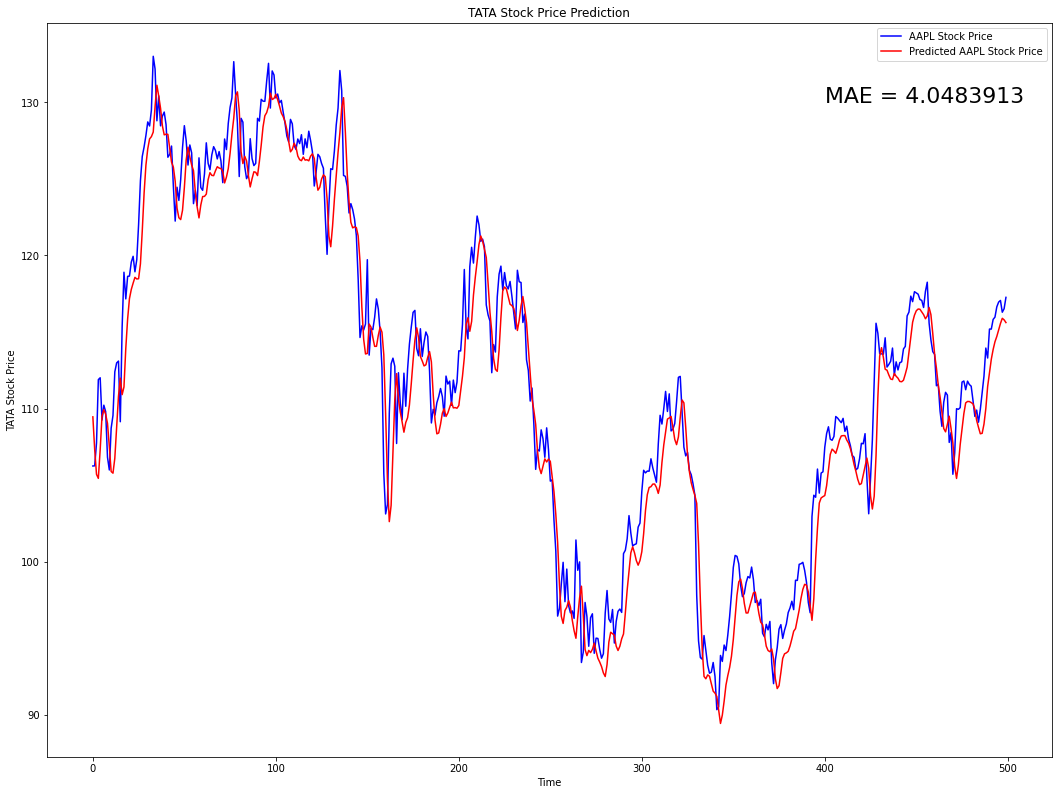

In [ ]:
import keras
plt.figure(figsize=[18, 13.5])
plt.plot(test_dataset[0:500], color = 'blue', label = 'AAPL Stock Price')
plt.plot(predicted_stock_price[0:500], color = 'red', label = 'Predicted AAPL Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
loss = keras.losses.mean_absolute_error(test_dataset, predicted_stock_price)
mae = np.mean(loss)
plt.text(400,130,"MAE = " + str(mae),fontsize=22)
plt.legend()
plt.show()

In [ ]:
# inital = train_dataset[-1:-51:-1]


In [ ]:
# for i in range(len(test_dataset)):
#   inital = np.append(inital,np.mean(inital[-1:-51:-1]))